In [4]:
import pandas as pd
import numpy as np
import os
import pickle
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import torch
import torch.nn as nn
from torchvision.utils import make_grid
import torchvision.transforms as transforms
import torch.nn.functional as F

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
DIRECTORY = '../Data part 2/'
CATEGORIES = ['Cloth mask','Mask worn incorrectly','N-95_Mask','No Face Mask','Surgical Mask']

data = []
labels = [] 
 
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    average1 = 0  
    average2 = 0
    number =  0
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        
        try:
            image = Image.open(img_path)
            average1 +=image.size[0]
            average2 +=image.size[1]
            number +=1
            data.append(image)
            labels.append([category,img])
        except:
            pass  
    # average1 = average1 /number 
    # average2 = average2 /number 
    # print("Average for class ",category," is ", average1, "X", average2)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Data part 2/Cloth mask'

In [ ]:
print(labels[0])

['Cloth mask', 'Clothing_Mask1.jpg']


In [ ]:
total_images = len(data)
train_dataset_size = 1590
test_dataset_size = total_images - train_dataset_size
test_dataset_percentage = test_dataset_size/total_images
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=test_dataset_percentage, random_state=42)

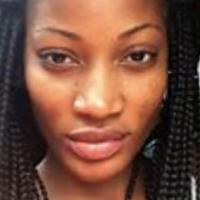

In [ ]:
data_train[0]

In [ ]:
f = open('annotation.csv','w')
for img,path in zip(data_test,labels_test):
    line1 = "../Data part 2/"+path[0]+"/"+path[1]+"\n"
    f.write(line1)
f.close()

In [ ]:
import csv
with open('annotation.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row[0])

../Data part 2/N-95_Mask/26.jpeg
../Data part 2/No Face Mask/28_0_3_20170119194503787.jpg.chip.jpg
../Data part 2/Mask worn incorrectly/35155_Mask_Mouth_Chin.jpg
../Data part 2/Mask worn incorrectly/35309_Mask_Mouth_Chin.jpg
../Data part 2/Mask worn incorrectly/35016_Mask_Mouth_Chin.jpg
../Data part 2/Mask worn incorrectly/35364_Mask_Mouth_Chin.jpg
../Data part 2/No Face Mask/26_1_1_20170113011638655.jpg.chip.jpg
../Data part 2/No Face Mask/26_0_3_20170119180400891.jpg.chip.jpg
../Data part 2/N-95_Mask/N95_Mask1158.jpg
../Data part 2/Cloth mask/Clothing_Mask145.jpg
../Data part 2/Surgical Mask/Surgical_Mask258.jpg
../Data part 2/No Face Mask/24_0_0_20170113210126406.jpg.chip.jpg
../Data part 2/Surgical Mask/Surgical_Mask182.jpg
../Data part 2/Cloth mask/Clothing_Mask19.jpg
../Data part 2/Surgical Mask/Surgical_Mask257.jpg
../Data part 2/Surgical Mask/Surgical_Mask564.jpg
../Data part 2/N-95_Mask/N95_Mask1186.jpg
../Data part 2/No Face Mask/23_1_3_20170104222224327.jpg.chip.jpg
../Data 

In [6]:
from PIL import Image
import os

# os.mkdir("../Data part 2/annotation/")
# os.mkdir("../Data part 2/annotation/N-95_Mask/")
# os.mkdir("../Data part 2/annotation/Mask worn incorrectly/")
# os.mkdir("../Data part 2/annotation/No Face Mask/")
# os.mkdir("../Data part 2/annotation/Surgical Mask/")
# os.mkdir("../Data part 2/annotation/Cloth mask/")


for img,path in zip(data_test,labels_test):
    # image = Image(img)
    image.save("../Data part 2/"+path[0]+"/"+path[1])
    

NameError: name 'data_test' is not defined